
***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

plt.rcParams['figure.figsize'] = (12.0, 8.0)

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

(0.0, 100.0)

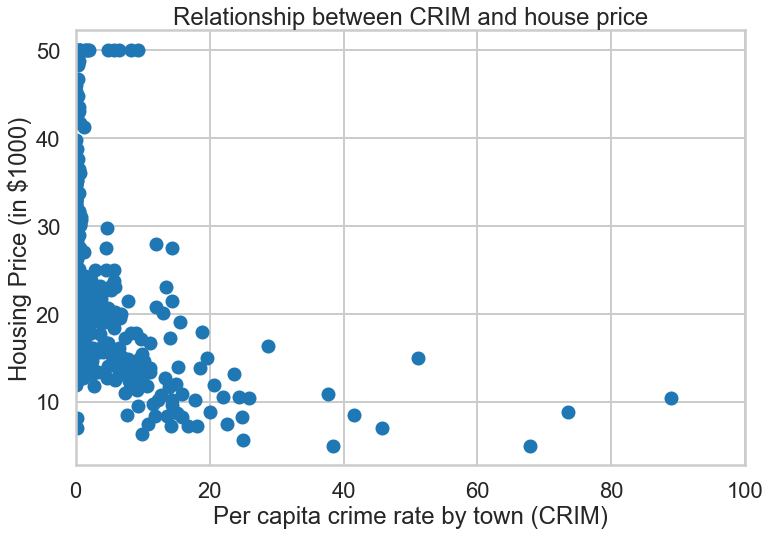

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price (in $1000)")
plt.title("Relationship between CRIM and house price")
plt.xlim(0,100)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Generally, there is a negative relationship between crime rate and housing price. As the crime rate increases, the house price decreases. We need to investigate further the data that seem to outlier (40 < CRIM < 60, 60 < CRIM). 

We also noticed some floor and celing effects and non-constant variance.  In neighborhoods with practically no crime, there is a very large variation in housing prices. There might be small house within the crime-free area.

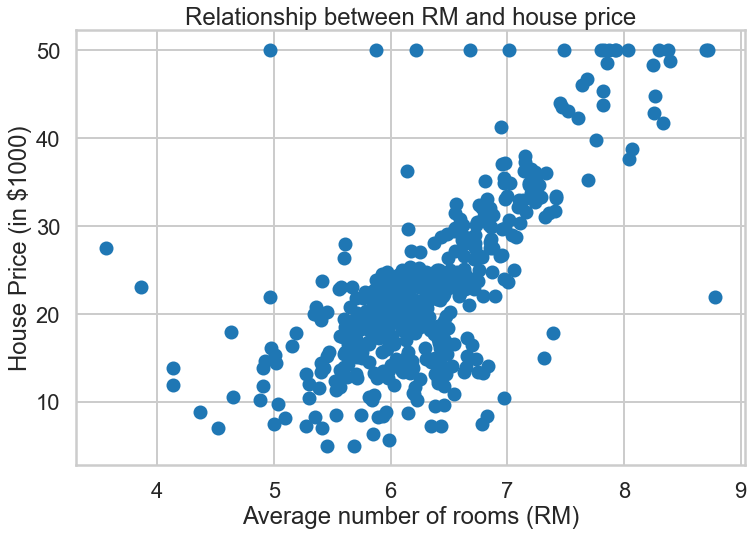

In [13]:
# scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (in $1000)")
plt.title("Relationship between RM and house price")
plt.show()

We observe a positive linear relationship between the housing price and the average number of rooms per dwelling (RM). 
Similar to previous plot on CRIM, here also we see some outliers that have housing price = 50. 


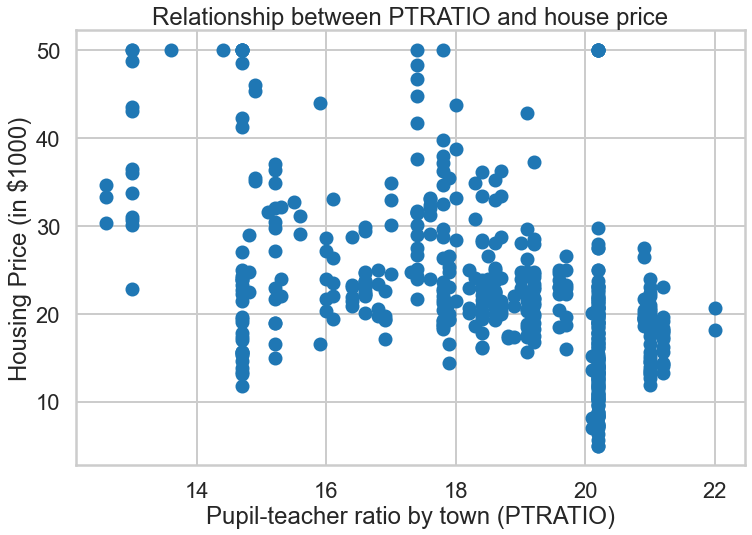

In [14]:
# scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price (in $1000)")
plt.title("Relationship between PTRATIO and house price")
plt.show()

There appears a general negative trend for housing price as a function of pupil-teacher ratio (PTRATIO), however, a large spread in housing values across the values of PTRATIO does not suggest a clear picture of a linear relationship. 

In [15]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

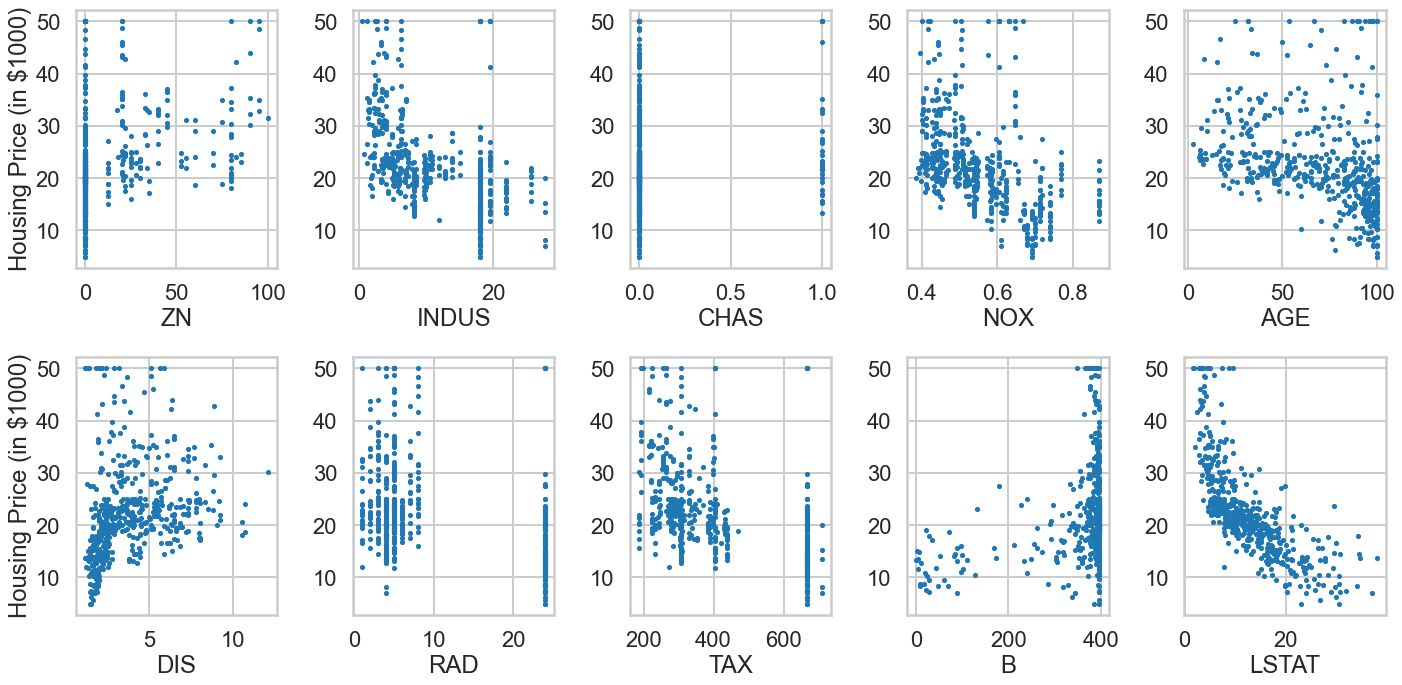

In [16]:
# create some other scatter plots

cols = [('B', "Rescaled Proportion of Population that is Black: $1000(p - 0.63)^2$"), 
             ('RAD', "Index of Radial Highway Accessibility"),
             ('TAX', "Property Tax Rate per $10,000"), 
             ('LSTAT', 'Percent Lower Status of the Population'),
             ('DIS', "Weighted Distance to Five Boston Business Centers"),
             ('AGE', 'Proportion of Owner-Occupied Units Build before 1940'),
             ('NOX', "Nitric Oxides Concentration (ppm)"),
             ('INDUS', "Proportion of Acreage Designated as Non-Retail Business"),
             ('ZN', "Proportion of Resident Land for Lots over 25k Square Feet"),
        ('CHAS', "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")
       ]

# detailed version
# for i, var in enumerate(cols):
#     plt.figure(i)
#     col, xax = var
#     plt.scatter(bos[col], bos.PRICE)
#     plt.xlabel("{} ({})".format(xax, col))
#     plt.ylabel("Housing Price (in $1000)")
#     plt.title("Relationship between {} and house price".format(col))


fig, ax1 = plt.subplots(2, 5, figsize=(20,10))

cols = ["ZN", "INDUS", "CHAS", "NOX", "AGE", "DIS", "RAD", "TAX", "B", "LSTAT"]

for i in np.arange(2):
    for j in np.arange(5):
        cid = j + (i*5)
        ax1[i,j].scatter(bos[cols[cid]], bos.PRICE, s=10)
        ax1[i,j].set_xlabel(cols[cid])
        if j==0:
            ax1[i,j].set_ylabel("Housing Price (in $1000)")
plt.tight_layout()

The notable results can be summarized as follows.  


| Variable | Interesting points | Relationship | Relationship intesnse | Direction | Outliers |
| :----------: | :----------: | :------: | :------: | :------:  |:------: |
| INDUS | Higher proportion of non-retail businesses are probably not desirable. | Yes | Moderate |Negative|Decretization effect above 15|
| NOX |  Pollution is probably not the first variable to impact the house price. | Yes | Moderate (due to the outliers laid in high prices) |Negative|High prices for most of the NOX levels|
| DIS | Large distance (suburbs), short distance (town) |  Yes |Strong at low values, weak at high values| Positive  | None |
| LSTAT | Lower status of the population (economic status) is probably related to lower house prices.| Yes | Yes | Negative |None|

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

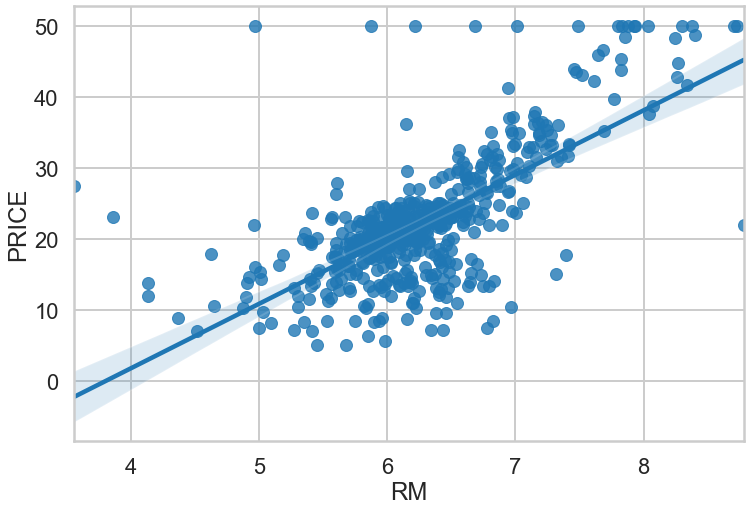

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


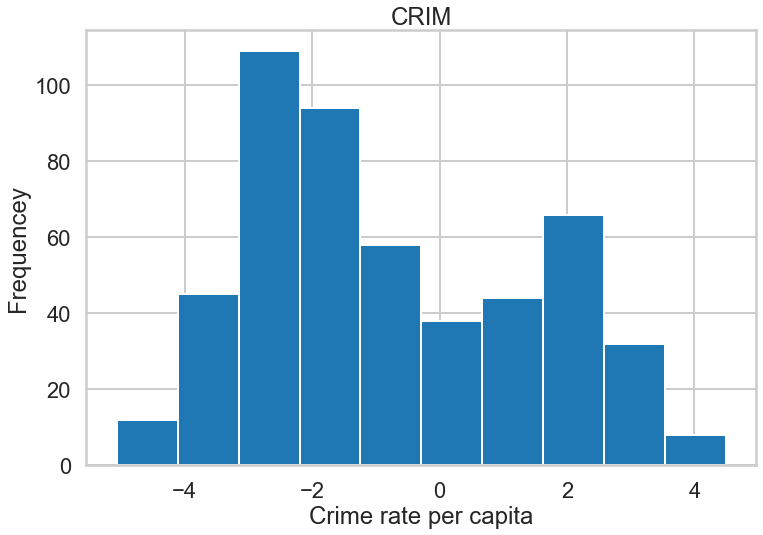

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p></div>

Text(0.5, 1.0, 'Histogram without log.')

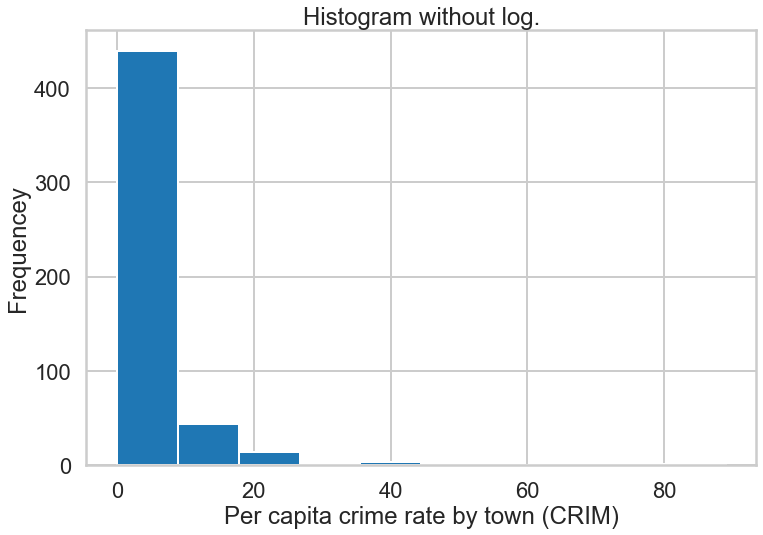

In [19]:
# Histogram without log.
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.ylabel("Frequencey")
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.title("Histogram without log.")

Without taking a log, the distribution is not normal. 
The skewness is obvious compared to the the plot where log transformation is made.
The purpose of using the log of CRIM makes the distribution bimodal normal distribution. 

Next, we want to know whether or not predictors are correlated. Let's plot the predictors against each other.

array([[<AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='DIS', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='AGE', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='NOX', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='INDUS', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='LSTAT', ylabel='DIS'>,
        <AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='AGE', ylabel='DIS'>,
        <AxesSubplot:xlabel='NOX', ylabel='DIS'>,
        <AxesSubplot:xlabel='INDUS', ylabel='DIS'>],
       [<AxesSubplot:xlabel='LSTAT', ylabel='AGE'>,
        <AxesSubplot:xlabel='DIS', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='NOX', ylabel='AGE'>,
        <AxesSubplot:xlabel='INDUS', ylabel='AGE'>],
       [<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>,
        <AxesSubplot:xlabel='DIS', ylabel='NOX'>,
        <AxesSubplot:xlabel='AGE', ylabel='NOX'>,
        <AxesSubplot:xlabel='NOX', ylabel='NOX'>,
        <AxesSubplot:xl

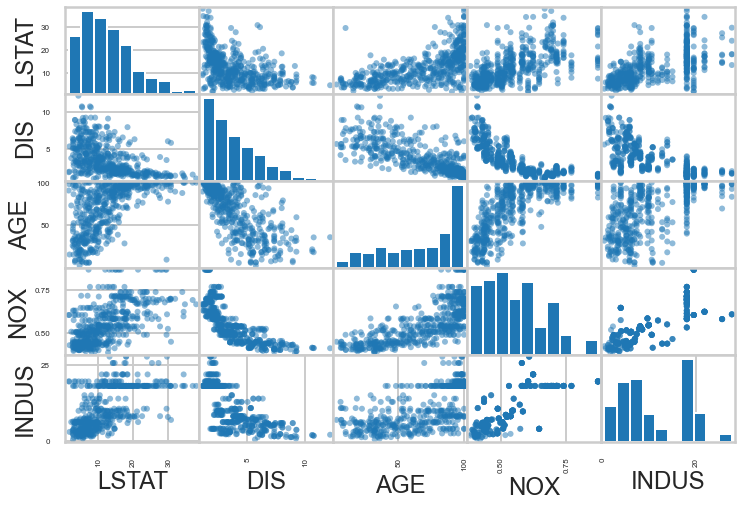

In [20]:
# After looking at all pairs of variables, the following variables were involved in the most intra-predictor correlations:
# LSTAT, DIS, AGE, NOX, INDUS

pd.plotting.scatter_matrix(bos[['LSTAT', 'DIS', 'AGE', 'NOX', "INDUS"]])

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).



* Formula
We have already seen that “~” separates the left-hand side of the model from the right-hand side, and that “+” adds new columns to the design matrix.

* Removing variables
The “-” sign can be used to remove columns/variables. For instance, we can remove the intercept from a model by:  
res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region) -1 ', data=df).fit()

* Multiplicative interactions
“:” adds a new column to the design matrix with the product of the other two columns. “*” will also include the individual columns that were multiplied together:  
res1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit()  
res2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        11:55:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

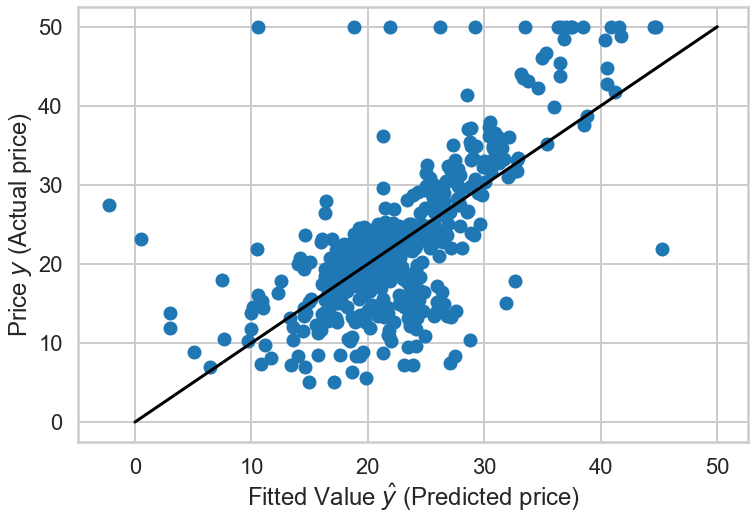

In [23]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Fitted Value $\hat{y}$ (Predicted price)")
plt.ylabel("Price $y$ (Actual price)")
plt.plot([0, 50], [0, 50], 'k-')

There is a strong linear relationship between the predicted (fitted) values and the original price. 
There are some outliers where the fitted value is quite a bit off from the actual price. 
In two towns, we predict nonsense median prices around 0 and the other is negative. 
We have another outlier around predicted median of 45, a town that was way overestimated. 
We also have several cases where the model underestimated median home values at the highest end of the original price range.

If our model were perfect, all of the points would fall along a straight line.

### Fitting Linear Regression using `sklearn`


In [24]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [26]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [27]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


**How would you change the model to not fit an intercept term?**  

Most models are fit with intercepts. What this means if that if we zero out all of the predictors, we will predict the baseline value of y.  

In the context of the problem it does not make any logical sense to have such a baseline (positive or negative), we can fit the model without an intercept. 

The model would simply require instantiation of a LinearRegression object with the fit_intercept set to False. If the intercept were set to zero that would imply that all of the predictor variables would be zero and the housing price must also equal zero. 
I highly doubt that outcome would occur, and **I would not recommend excluding the intercept**.
In this model, **we fit an intercept.** We have several variables that can take on the value of 0 yet we expect a non-zero median home price.

In [28]:
# To fit a model without an intercept
lm_no_intercept = LinearRegression(fit_intercept=False)
lm_no_intercept.fit(X, bos.PRICE)

LinearRegression(fit_intercept=False)

**One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed?**

**NO.** The key is in the phrase *indentically distributed.* The residuals may be normally distributed but that does not mean they all come from a normal distribution with the same mean and standard deviation.

**Trur of False. To use linear regression, Y must be normally distributed.**

**False.** Though having Y be normally distributed probably helps. The assumption is that the *residuals* are normally distributed, not Y.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [29]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [30]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [31]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [32]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

**Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?**

Text(0, 0.5, 'Frequency')

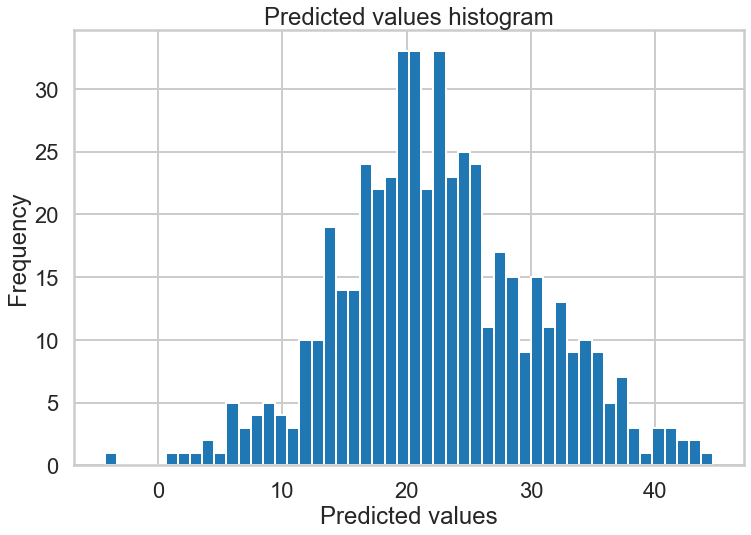

In [33]:
# your turn

predicted = lm.predict(X)
plt.hist(predicted, 50)
plt.title("Predicted values histogram")
plt.xlabel("Predicted values")
plt.ylabel("Frequency")

The distribution of the predicted prices looks approximately normally distributed with a mean around \$22,000.
There do not appear to be any obvious outliers, though with a smaller bin size, the lowest predictions may indeed be outliers.

**Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).**

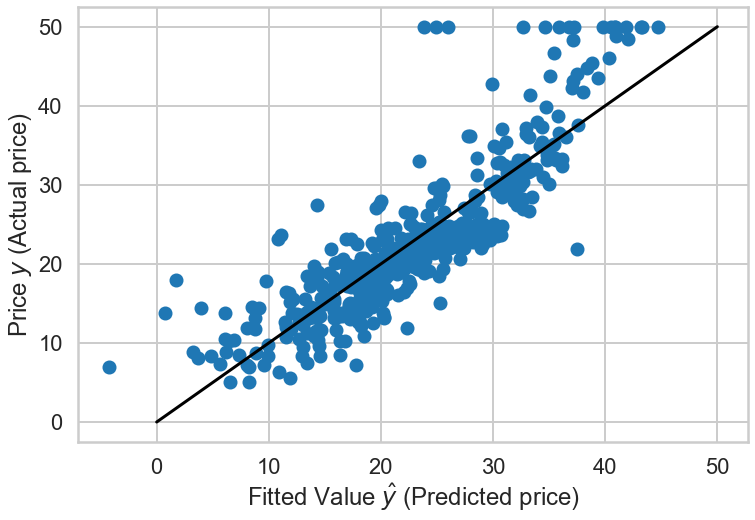

In [34]:
plt.scatter(predicted, bos.PRICE)
plt.xlabel("Fitted Value $\hat{y}$ (Predicted price)")
plt.ylabel("Price $y$ (Actual price)")
plt.plot([0, 50], [0, 50], 'k-')

The predicted values and the original true values fall along a nearly straight line. The variance also looks to be constant.

**We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?**

Computing summary statistics is done automatically in `statsmodels` but must be done by hand in `scikit-learn`.    

`statsmodels` has advantage of providing statistical summary (like t score, p-values) for all predictors and for intercept. The `scikit-learn` does not have this feature.  

The `scikit-learn` has advantage in terms of writing the equation. In `scikit-learn`, we just need to split the data to get features (X) and labels (y), and provide X and y as input. In short, `scikit-learn` pretty much just provides the the predicted values and the estimates of the regression coefficients.  
In case of `statsmodels`, we need to explicitly write the expression.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.  

[note by arhan]  
$\sum_{}(Actual - Predicted)^2$

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [35]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

[note by arhan]  
$\sum_{}(Predicted - Mean)^2$


$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [36]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.11785704968299e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

**Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.**

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

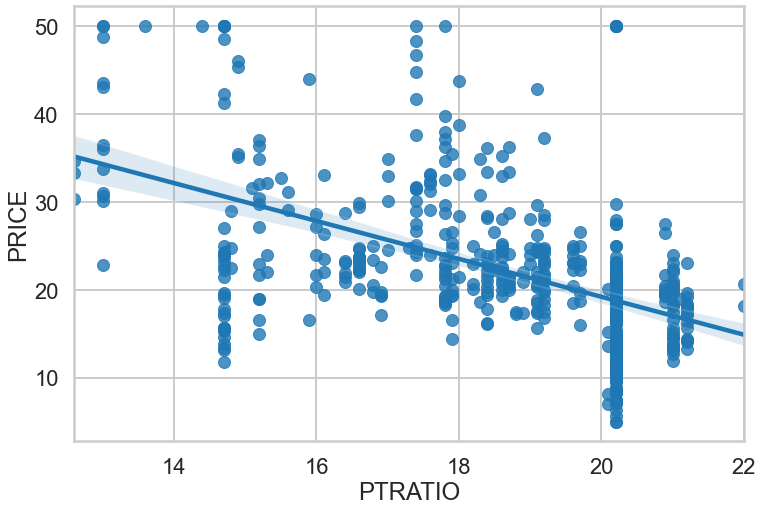

In [37]:
#  linear regression model x='PTRATIO', y='PRICE'
sns.regplot(x="PTRATIO", y="PRICE", data=bos)

In [38]:
m = ols('PRICE ~ PTRATIO', bos).fit()
print(m.summary())
r2 = m.rsquared_adj
f = m.f_pvalue

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           1.61e-34
Time:                        12:18:14   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Pupil to teacher ratio is statistically significant since its p-value is less than 0.05. This means it has a significant effect on median house price in a town.  
The model indicates that the average housing price is 62.35 when the pupil-teacher ratio is 0 (or no pupils in that area).  
It has a coefficient estimate of -2.16 which means that on average, an addition of one student per teacher to the average ratio is associated on average with a decrease of $2,160 in median house price in a town (i.e., PTRATIO increases by 1, the housing price decreases by 2.16).


**Calculate (or extract) the $R^2$ value. What does it tell you?**  

The adjusted $R^2$ value is 0.256. This means that 25.6\% of the total variation in housing price is described by the model with only PTRATIO as a predictor variable.


**Compute the $F$-statistic. What does it tell you?**

 The F-statistic value of 175.1 is associated with a p-value of 0 ($1.61 \times 10^{-34} \approx 0$). 
We reject the null hypothesis that the beta coefficient(s) are (all) equal to zero. At least one of the variables in the model is significant.
This means PTRATIO coefficient found in the model are statistically significantly different from 0. 

**Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice?**  

The F-statistic is square of the t value for PTRATIO in this case.
It is important to note that this relationship ONLY holds for simple linear regression.

$$F = 175.1, t = -13.233$$
$$F = 175.1 = (-13.233)^2 = t^2$$
$$F = t^2$$

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [39]:
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           6.15e-98
Time:                        12:18:29   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

**F-statistic**: 245.2 (p-value = 0). This means that at least one of the variables included in the model is a significant predictor (there is at least one $\beta$ coefficient that is non-zero).

**Adj. $R^2$**: 0.592. This means that 59.2% of the variation in housing price is described by the variation in CRIM, RM and PTRATIO together.  

**All of the variables have p-values less than 0.05, so each of them contributes to the median house price.**  
The coefficient of -1.07 for pupil-teacher-ratio means that every student added to the pupil-to-teacher ratio for a town is associated on average with a decrease of $1,070 in median house price in a town. **Note that this value is *different* from the previous analysis.** What this suggests is that in the original model with only `PTRATIO`, **`PTRATIO` was masking some of the variance for which the other variables are responsible**.  

The coefficient for average number of rooms is 7.38. This means that increasing the average number of rooms in a dwelling by one is associated with, on average, a $7,380 increase in the median house price.  

The coefficient for crime rate is -0.21. This means that a one-unit increase (1%) in a per-capital crime rate is associated with a decrease of $210 in the median house price of a town.  

The intercept is -3.37 and its p-value is 0.404. If this value were significant, it would mean that a town with no students, no rooms and no crime would have an average home price of -$3,370 which does not make sense. 
Since the intercept is not statistically significant, we cannot really make an inference about it. This does not, however, suggest that we should remove the intercept because, for example, just because a town has zero crime, that does not mean the median home price should also be zero. The intercept not being significant is pretty unusual. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [40]:
m_var4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(m_var4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          5.84e-123
Time:                        12:18:48   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

Adding the variables LSTAT to the previously built model decreases the value of AIC, which indicates the better fitting model (AIC: 3232 -> 3112). 

The p-value for F-statistic is 0, indicating that not all coefficients are 0. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

**Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?**  

Text(0, 0.5, 'Residual ($y - \\hat{y}$)')

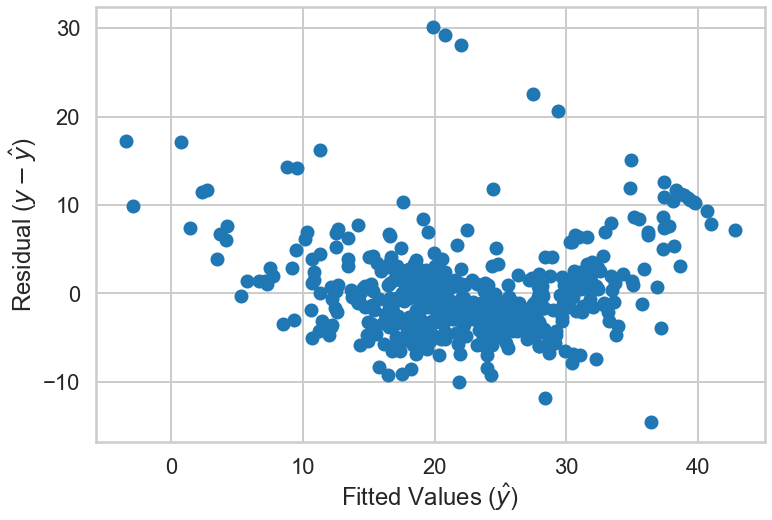

In [41]:
# fitted values versus residuals plot

# m_var4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
plt.scatter(m_var4.fittedvalues, m_var4.resid)
plt.xlabel("Fitted Values ($\hat{y}$)")
plt.ylabel("Residual ($y - \hat{y}$)")

The residuals vs. fitted plot shows more or less a blob without a trend. Note the diagonal line going through the plot. This is a ceiling effect from the capped housing prices at 50. Note that the largest residuals occur at the lower end of the range for fitted values. Our model does not perform great here, but no violations of the assumptions. The variance also appears to be constant, so again no violations.

**Construct a quantile plot of the residuals. What does the plot tell you?**

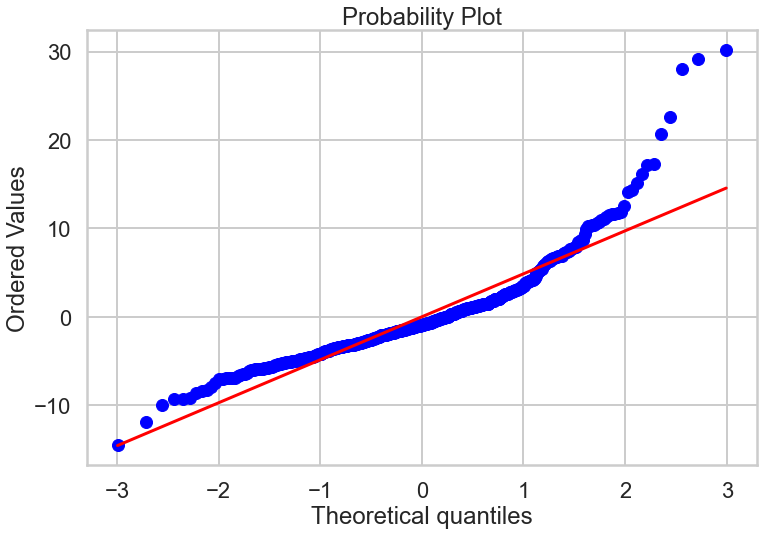

In [42]:
# quantile plot of the residuals

# stasmodel
# resid = m_var4.resid
# mean = np.mean(resid)
# sd = np.std(resid)
# z = (resid - mean) / sd
# sm.qqplot(z, line='45')

# resid = bos.PRICE (actual: $y$) - m_var4.fittedvalues (predicted: $\hat{y}$)
from scipy.stats import probplot
resid = m_var4.resid
qq = probplot(resid, plot=plt)

(array([  2.,  34., 202., 186.,  48.,  22.,   5.,   3.,   1.,   3.]),
 array([-14.54922191, -10.07867384,  -5.60812577,  -1.1375777 ,
          3.33297037,   7.80351844,  12.27406651,  16.74461458,
         21.21516265,  25.68571073,  30.1562588 ]),
 <BarContainer object of 10 artists>)

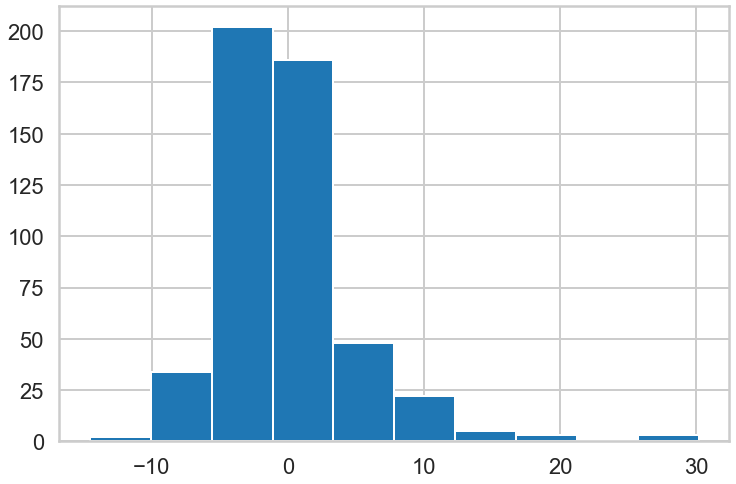

In [43]:
plt.hist(resid)

The quantile plot more or less follows a straight line, but starts to veer off at higher values. There is a positive skewness in the residual data. This could be due to outliers, or due to the ceiling effect. 
The residuals are not normally distributed though the bulk of the residual quantiles lie along the line.


**What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?**

The quantile plot is not capable of testing homoscedasticity (i.e. varying variance), whereas the residual plot can be used to check if the data is homoscedastic or not.  


The residual plot is good in checking if the residuals are independently distributed or not. It is possible to have correlated residuals even when the distribution of residuals is normal. 
Additionally, it helps us diagnose issues with our model such as outliers, correlated errors, nonlinearity etc.  


The quantile plot does not convey as much information but allows us to quickly determine whether or not the distributions is normal, just look for a line. 
An advantage of the quantile plot over the fitted vs residual plot is that we can use it to test for any distribution. 
All we need is the quantiles/percentiles of our data, and a way to generate the quantiles for the distribution we want to compare to.  

**Identify any outliers (if any) in your model and write a story describing what these outliers might represent.**  

Let's generate some plots to see the outliers.

<Figure size 1440x1152 with 0 Axes>

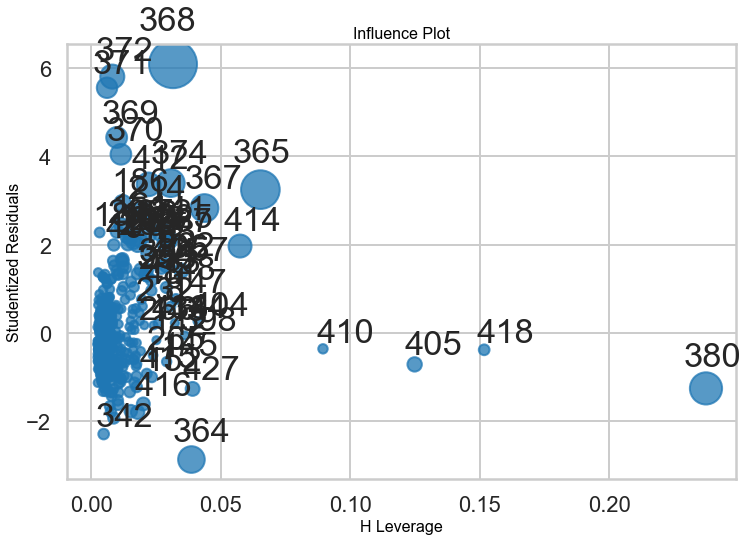

In [44]:
import statsmodels.graphics.regressionplots as plots

# avoid duplicated figures
fig = plt.figure(figsize=(20,16))

#fig = plots.influence_plot(m_var4, alpha=0.01, plot_alpha=0.2, fontsize="small")
fig = plots.influence_plot(m_var4)

**Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.** 

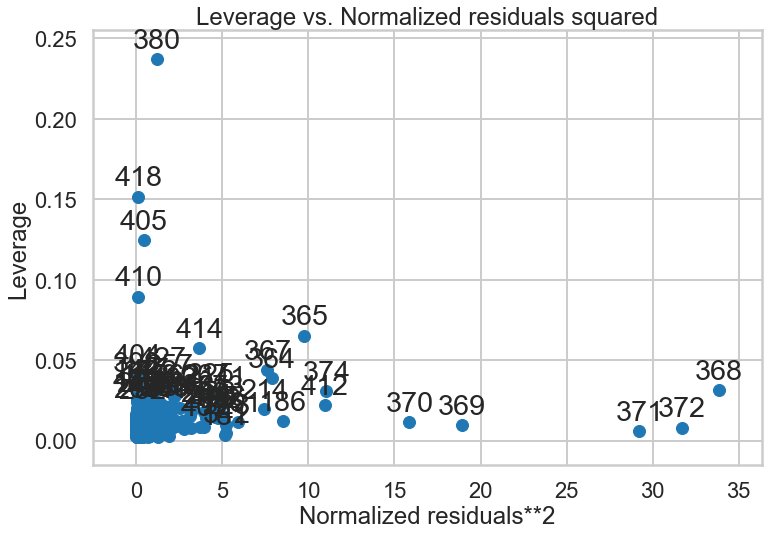

In [45]:
fig = plots.plot_leverage_resid2(m_var4)

Looking at the influence plot and the leverage plot, we selected the indices having high residuals (possible outliers) and high leverage to investigate further: (368, 372, 371, 369, 370) and (380, 418, 405, 410).

In [46]:
index_pos_outliers = [368, 372, 371, 369, 370, 380, 418, 405, 410]
# remove duplicated elements
index_pos_outliers = list(set(index_pos_outliers))

cols_var4 = ["CRIM", "RM", "PTRATIO", "LSTAT", "PRICE"]
bos_var4 = bos[cols_var4]
# adjust the skewed data
bos_var4["logCRIM"] = np.log(bos_var4["CRIM"])
bos_var4 = bos_var4.drop(["CRIM"], axis=1)
newcols = ["logCRIM", "RM", "PTRATIO", "LSTAT", "PRICE"]
bos_var4 = bos_var4[newcols]

bos_var4_outliers = bos_var4.iloc[index_pos_outliers]
bos_var4_outliers

<ipython-input-46-95b49389b798>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bos_var4["logCRIM"] = np.log(bos_var4["CRIM"])


,logCRIM,RM,PTRATIO,LSTAT,PRICE
418,4.297749,5.957,20.2,20.62,8.8
368,1.588872,4.970,20.2,3.26,50.0
369,1.735186,6.683,20.2,3.73,50.0
370,1.877748,7.016,20.2,2.96,50.0
371,2.222708,6.216,20.2,9.53,50.0
372,2.112302,5.875,20.2,8.88,50.0
405,4.218342,5.683,20.2,22.98,5.0
410,3.934485,5.757,20.2,10.11,15.0
380,4.488369,6.968,20.2,17.21,10.4


**Possible outliers:**
The data points indices of 368, 369, 370, 371, 372 have housing price = 50. 
This is very suspicious as a data entering error due to the subsequent indices with house price of 50.
It may also be due to the presence of a default value in the data system.

Let's visualize these data.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


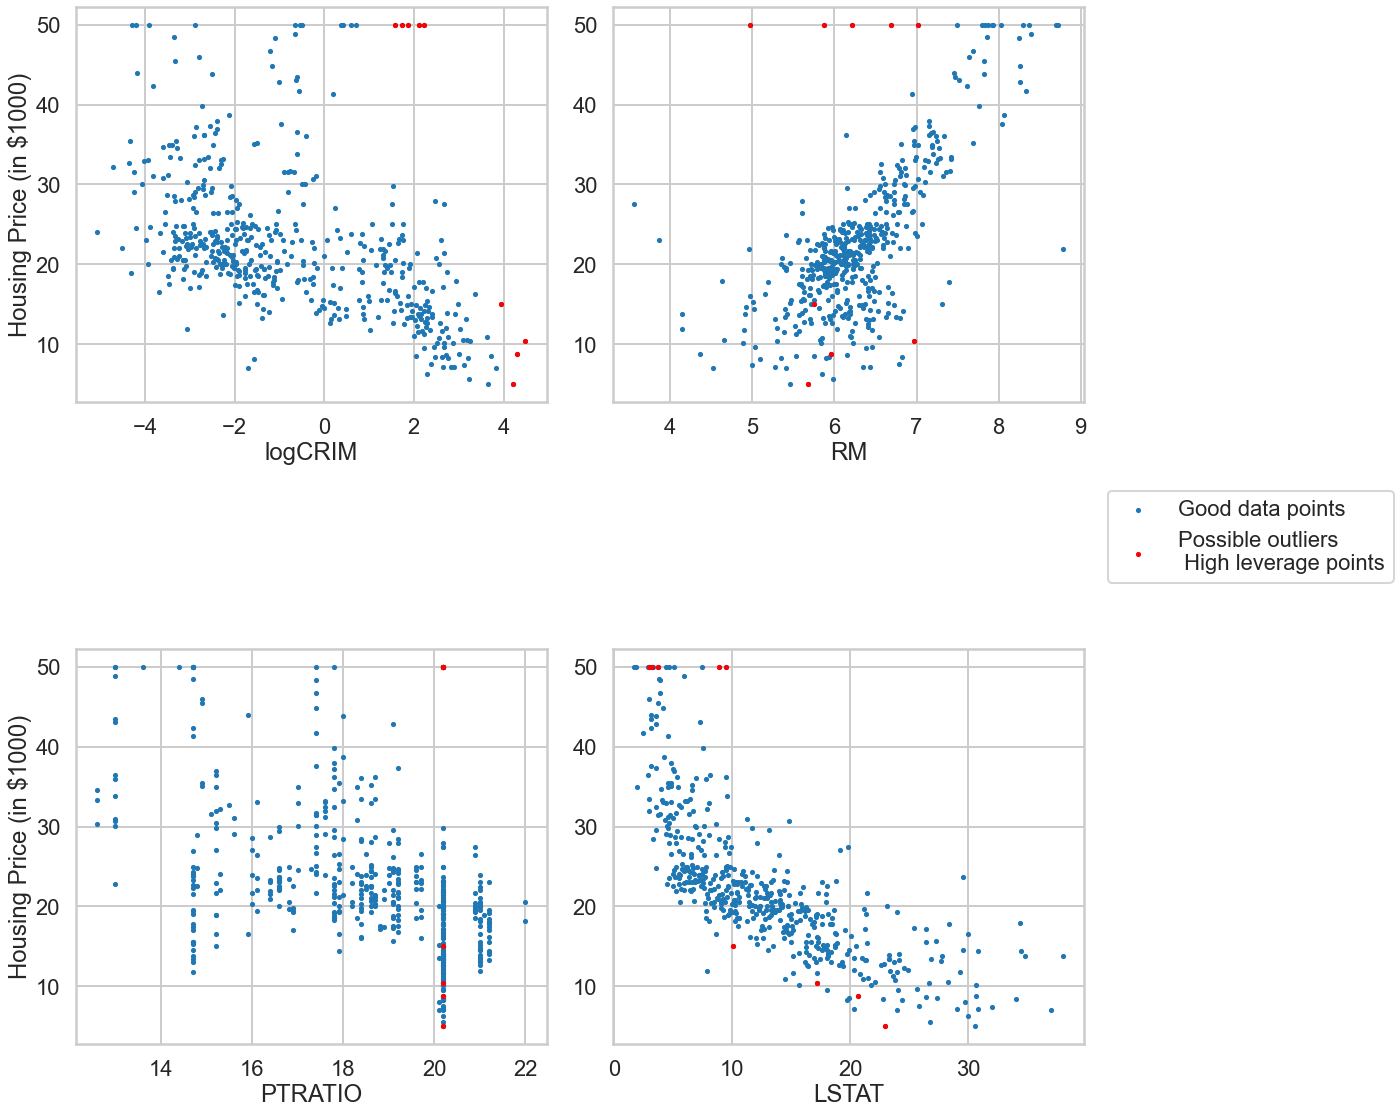

In [47]:
cols = bos_var4.columns

fi2, ax2 = plt.subplots(2, 2, figsize=(20,16))

for i in np.arange(2):
    for j in np.arange(2):
        cid = j + (i*2)
        ax2[i,j].scatter(bos_var4[cols[cid]], bos_var4.PRICE, s=10, label="Good data points")
        ax2[i,j].scatter(bos_var4_outliers[cols[cid]], bos_var4_outliers.PRICE, c="red", label="Possible outliers \n High leverage points", s=10)
        ax2[i,j].set_xlabel(cols[cid])
        if j==0:
             ax2[i,j].set_ylabel("Housing Price (in $1000)")
        plt.legend(bbox_to_anchor=(1.05, 1.4), loc=2, borderaxespad=0.)
plt.tight_layout()



# fig, ax1 = plt.subplots(2, 5, figsize=(20,10))
# cols = ["ZN", "INDUS", "CHAS", "NOX", "AGE", "DIS", "RAD", "TAX", "B", "LSTAT"]

# for i in np.arange(2):
#     for j in np.arange(5):
#         cid = j + (i*5)
#         ax1[i,j].scatter(bos[cols[cid]], bos.PRICE, s=10)
#         ax1[i,j].set_xlabel(cols[cid])
#         if j==0:
#             ax1[i,j].set_ylabel("Housing Price (in $1000)")
# plt.tight_layout()


**Remove the outliers and high leverage points from your model and run the regression again. How do the results change?**

We try to remove PRICE = 50 and build the model.

In [48]:
bos_var4_out = bos_var4_outliers.loc[bos_var4_outliers["PRICE"] == 50]

#  bos_var4_adj: remove possible outlier rows that has "PRICE" == 50
bos_var4_rm = bos.drop(bos_var4_out.index)

In [49]:
m_var4_adj = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos_var4_rm).fit()
print(m_var4_adj.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     361.3
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          2.04e-145
Time:                        12:21:22   Log-Likelihood:                -1459.3
No. Observations:                 501   AIC:                             2929.
Df Residuals:                     496   BIC:                             2950.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5758      3.439      4.239      0.0

The conditions for a better model is as follows:  

- The $R^2$ may (or may not) increase with the influential points removed.
- The AIC may drop.
- The residuals vs fitted plot may not show as many outliers.
- The quantile plot may follow the straight line more closely.

**Conclusion:**

We have removed the data points indices of 368, 369, 370, 371, 372 have housing price = 50. 
**As a result, we built the better model.**
The final results of the two models (previous model (m_var4) and adjusted model (m_var_adj)) is summarized as follows.

In [50]:
AdjR2 = [m_var4.rsquared_adj, m_var4_adj.rsquared_adj]
AIC = [m_var4.aic, m_var4_adj.aic]
Fpvalue = [m_var4.f_pvalue, m_var4_adj.f_pvalue]

result_df = pd.DataFrame({"Adj. R-squared":AdjR2, "AIC": AIC, "F_pvalue": Fpvalue}, index=["Previous model", "Adjusted model"])
result_df

,Adj. R-squared,AIC,F_pvalue
Previous model,0.678949,3111.56109,5.838926e-123
Adjusted model,0.742423,2928.68451,2.035191e-145
